## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep=';')

In [3]:
df.shape

(500, 19)

In [4]:
df.head(2).T

,0,1
Page total likes,139441,139441
Type,Photo,Status
Category,2,2
Post Month,12,12
Post Weekday,4,3
Post Hour,3,10
Paid,0,0
Lifetime Post Total Reach,2752,10460
Lifetime Post Total Impressions,5091,19057
Lifetime Engaged Users,178,1457


In [5]:
df.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Page total likes,500.0,123194.176000,16272.813214,81370.0,112676.00,129600.0,136393.00,139441.0
Category,500.0,1.880000,0.852675,1.0,1.00,2.0,3.00,3.0
Post Month,500.0,7.038000,3.307936,1.0,4.00,7.0,10.00,12.0
Post Weekday,500.0,4.150000,2.030701,1.0,2.00,4.0,6.00,7.0
Post Hour,500.0,7.840000,4.368589,1.0,3.00,9.0,11.00,23.0
Paid,499.0,0.278557,0.448739,0.0,0.00,0.0,1.00,1.0
Lifetime Post Total Reach,500.0,13903.360000,22740.787890,238.0,3315.00,5281.0,13168.00,180480.0
Lifetime Post Total Impressions,500.0,29585.948000,76803.246670,570.0,5694.75,9051.0,22085.50,1110282.0
Lifetime Engaged Users,500.0,920.344000,985.016636,9.0,393.75,625.5,1062.00,11452.0
Lifetime Post Consumers,500.0,798.772000,882.505013,9.0,332.50,551.5,955.50,11328.0


# Part 1 - Data Set Questions

##### 1. What is the most common (i.e the one that appears the most in this data) type of post?

In [7]:
print(f'The most common type of post is "{df.Type.mode().iloc[0]}"')

The most common type of post is "Photo"


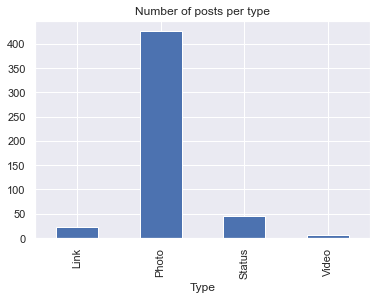

In [20]:
df.groupby('Type').size().plot.bar()
plt.title('Number of posts per type');

##### 2. On average, which type of post received most ‘Page total likes’? Does this agree with the post ‘like’ metric?

In [24]:
print('On average, "{}" received most "Page total likes"'.format(
    df.groupby('Type')['Page total likes'].mean().idxmax()))

On average, "Video" received most "Page total likes"


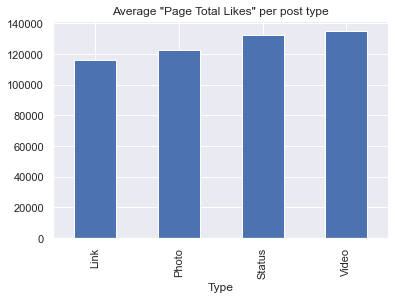

In [25]:
df.groupby('Type')['Page total likes'].mean().plot.bar()
plt.title('Average "Page Total Likes" per post type');

In [26]:
print('On average, "{}" received most "likes"'.format(
    df.groupby('Type')['like'].mean().idxmax()))

On average, "Video" received most "likes"


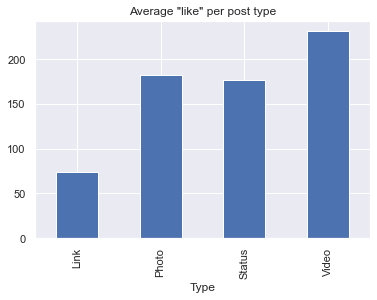

In [27]:
df.groupby('Type')['like'].mean().plot.bar()
plt.title('Average "like" per post type');

From the three types of posts, `Video` received most average `Page total likes`, as well as most average `likes`.

##### 3. On average, do paid video posts (Paid=1) receive more shares than the unpaid ones? Given that this data is for a Facebook page of a cosmetics brand, can you think of any reasons for the results you obtain? (i.e. if no, then why not?)

In [28]:
print(df.groupby('Paid').share.mean().to_string())

Paid
0.0    25.219101
1.0    32.503597


In [29]:
print('\nOn average, paid video posts {}receive more shares than the unpaid ones.'.format(
    '' if df.groupby('Paid').share.mean().idxmax() == 1.0 else 'do not '
))


On average, paid video posts receive more shares than the unpaid ones.


The reason for paid video posts receiving more shares is that they get promoted in the feeds of their subscribers, as well as shown to people outside their subscriber base.

##### 4. ‘Lifetime post consumers’ is the number of people who clicked anywhere in a post. ‘Lifetime post consumption’ is the number of clicks anywhere in a post. For each post, approximate the ‘consumption per user’ and determine the post type and month that, on average, receive the most ‘consumptions per user’. Is this result different from the total ‘Lifetime post consumers’ by post type and month?

In [30]:
# see if there are any zero Lifetime Post Consumers,
# so that we don't divide by zero at the next cell
df[df['Lifetime Post Consumers'] == 0].size

0

In [31]:
# Create the KPI `Consumptions per User`

df['Consumptions per User'] = df['Lifetime Post Consumptions'].divide(
    df['Lifetime Post Consumers'], axis=0)

In [32]:
df.groupby(['Type', 'Post Month'])['Consumptions per User'].mean().idxmax()

('Photo', 3)

On average, `Photo` posts in `March` receive the most `consumptions per user`.

In [33]:
df.groupby(['Type', 'Post Month'])['Lifetime Post Consumers'].mean().idxmax()

('Video', 7)

The result is different for `Lifetime post consumers`, with higher average numbers for `Video` posts in `July`.

##### 5. For the ‘Photo’ type posts, find the month that shows the greatest absolute skew in the distribution of the ‘consumptions per user’. Use whichever definition of ‘skew’ you think is appropriate for this data (e.g. it can be any numeric or visual estimate).

In [34]:
df.loc[df.Type == 'Photo'].groupby('Post Month')[
    'Consumptions per User'].skew().idxmax()

7

`July` is the month that shows the greatest absolute skew in the distribution of the `consumptions per user`.

Let's also see the distributions in a violin plot.

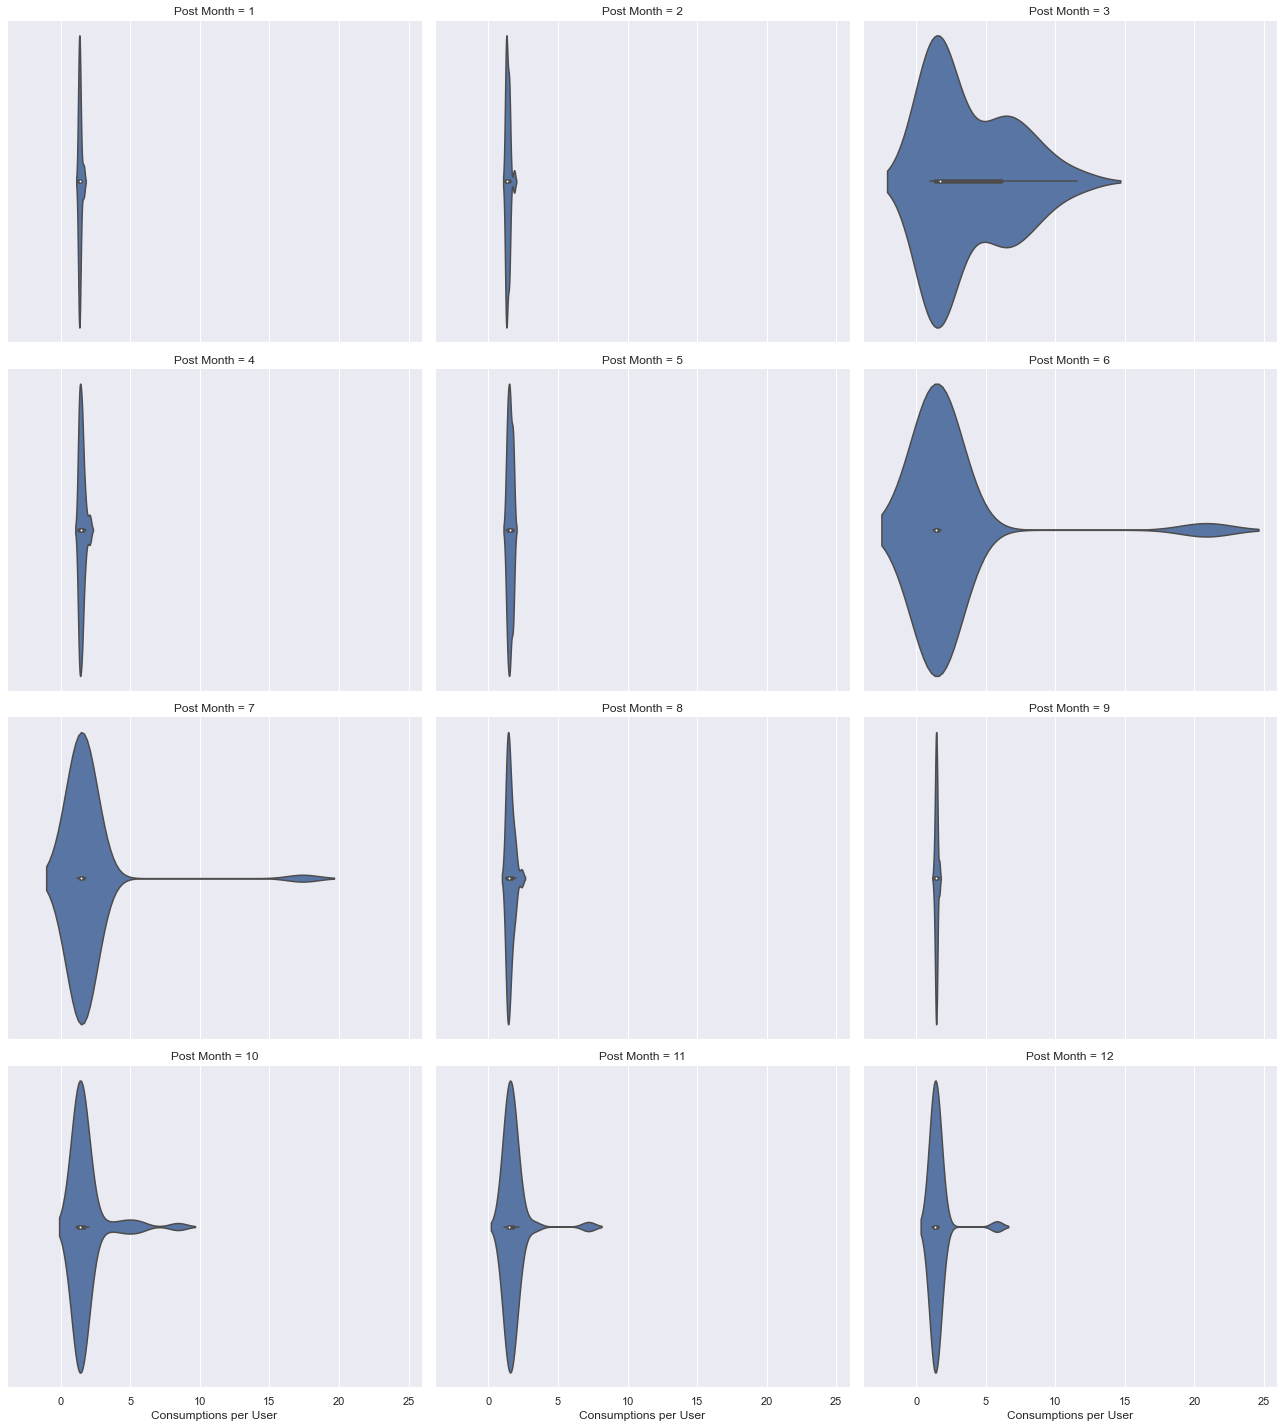

In [36]:
months = df.loc[df.Type == 'Photo', 'Post Month'].sort_values().unique()
g = sns.FacetGrid(df[df.Type == 'Photo'].sort_values('Post Month'),
                  col='Post Month', col_wrap=3, row_order=months,
                  height=5, aspect=1.2
                 )
g.map(sns.violinplot, 'Consumptions per User');